In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# An Accurate Replacement Fertiltiy Rate for Bulgaria (And Why It Matters)

### Introduction
In the realm of demographics, the replacement fertiltiy level is described as the amount of children each woman would need to have in order to maintain a stable population. This rate is often considered to be 2.1 children per woman. While this is useful in certain cases, it might help to be a little more accurate than this when looking at specific countries, as each nation deals with its own unique circumstances. In this paper, we will be looking at whether Bulgaria's replacement fertility level should be slightly different and how that potential difference may impact the country in terms of development.

### Key Terms
While we will be focusing mainly on the replacement fertility level, in order to get a thorough enough understanding of what we are dealing with, we will be going over some other key concepts first. This will allow us to draw better conclusions about the underlying issues and analyze recent population trends in the country.

Here is a list of all the key terms we will be using throughout this article:
* net migration
* mortality rate
* total fertility rate
* sex ratio at birth
* (mean) age of childbearing
* replacement fertility level

Let us take a look at each of them individually and create a funciton for them (we might need some of them later on).

#### Net Migration
Net migration refers to the net total of migrants throughout a certain period. In other words, if we take the number of immigrants ($I$) and subtract from that the number of emigrants ($E$), we will end up with the net migration ($NM$).

$$ NM = I - E $$

In [2]:
def calculate_net_migration(i, e):
    result = i - e
    return result

#### Mortality Rate
The mortality rate ($MR$) is a probability of someone in a specific population dying. Rather than being looked at simply as the number of deaths ($D$) divided by the still living population ($P$) plus the death count, it is typically expressed as the number of deaths observed per every 1000 people in that period.

$$ MR = \frac{D}{P + D} \cdot 1000 $$

In [3]:
def calculate_mr(d, p):
    result = (d * 1000) / (p + d)
    return result

#### Total Fertility Rate
The total fertility rate in a given year is the average amount of children that each woman gives birth to, assuming that she would survive all her fertile years and that her births would align with the current age-specific fertility rates ($ASFR$). Typically, age-specific fertility rates are gathered across different age groups of five year intervals (15-19-year-olds, 20-24-year-olds, etc.). They are calculated by dividing the number of births within the age group ($B_{ag}$) by their population ($P_{ag}$). 

$$ ASFR = \frac{B_{ag}}{P_{ag}} $$

In [4]:
def calculate_asfr(b_ag, p_ag):
    result = b_ag / p_ag
    return result

As a result, the total fertility rate is defined as the sum of all age-specific fertility rates multiplied by the number of age groups ($n$).

$$ TFR = n \cdot \sum ASFR $$

In [5]:
def calculate_tfr(asfr=list):
    result = sum(asfr) * len(asfr)
    return result

#### Sex Ratio at Birth
Sex ratios at birth ($SRB$) represent the proportion of male ($B_{m}$) and female ($B_{f}$) newborns at that respective order.

$$ SRB = \frac{B_{m}}{B_{f}}$$

In [6]:
def determine_srb(b_m, b_f):
    ratio = b_m / b_f
    return ratio

#### Mean Age of Childbearing
Also known as mean age of mothers at childbirth ($\bar{A_{m}}$), this is calculated by taking the sum of all mothers' ages at the point of their giving birth divided by all births for that year ($B$), no matter whether it is her first born or not.

$$ \bar{A_{m}} = \frac{\sum A_{m}}{B} $$

In [7]:
def calculate_mac(sum_mothers_ages, b):
    result = sum_mothers_ages / b
    return result

### Replacement fertility level
As mentioned in the introduction, the replacement fertility level is the amount of children each woman would need to bare to ensure a stable population (ignoring migration). While 2.1 children per woman is used in a lot of cases as a univeral replacement rate, this can be a vast generalization. It is important to understand why this number is not the same across the world.

#### An Accurate Replacement Rate
Research shows that such a rate is currently only applicable for the more developed countries. For instance, in 2001, the office of population research at Princeton University stated in an article that some nations had a replacement rate as high as 3.4. Sometimes, the accurate number for some nations could be even a little lower. In 2005, according to an article by the Office for National Statistics in the UK, it was determined that England and Wales had a replacement rate of 2.07 two years previously.

#### Key factors
There are two key factors to consider when determining a country's replacement fertility level - mortality before childbearing and birth sex ratios. The death rates are important becuase not all women end up living the entirety of their fertile years, meaning that some portion of them will inevitably not be able to have a single child. Sex ratios matter since a higher proportion of males being born would mean that women would need to have more children on average so as to maintain the population. The average sex ratio for the whole world is approximately 1.05 males to every 1 female.

#### Formula
To reach such a figure, we will use the calculation method, used by Princeton University. Here, we take the sex ratio at birth ($SRB$) and add one to it. The result is then divided by the probability of a woman reaching the mean age of childbearing ($\mathcal{P}(\bar{A_{m}})$). What we end up with is the replacement fertility rate ($TFRr$).

$$ TFRr = \frac{(1 + SRB)}{\mathcal{P}(\bar{A_{m}})} $$

In [8]:
def calculate_replacement_level(srb, prob):
    result = (1 + srb) / prob
    return result

We now know how to reach the number we need. Before we make a hypothesis though, let us take a look at the data we do have on Bulgaria's population in recent decades.

### Population Trends in Bulgaria (1950-2023)
Now that we have some understanding of the terms, let's see them in practice by looking at data collected by the United Nations from 1950-2023. We have data for population, births, deaths, net migration, and fertility rates. In order to make some better comparisons, we will plot the births and deaths on the same graph.

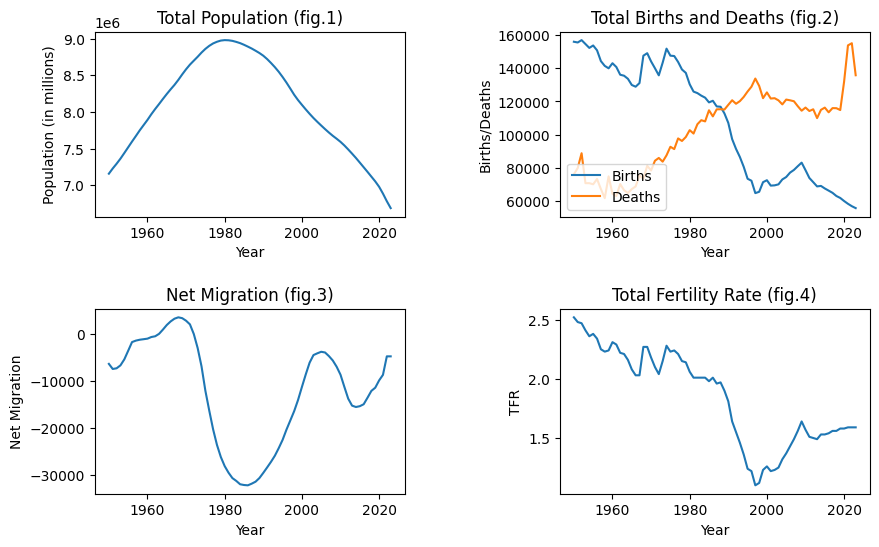

In [9]:
demographics_table = pd.read_csv('sql-database/un-demographics-table.csv')

f, ax = plt.subplots(2, 2)
ax[0, 0].plot(demographics_table['YearId'].values, demographics_table['Population'].values)
ax[0, 0].set_title('Total Population (fig.1)') 
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('Population (in millions)')

ax[0, 1].plot(demographics_table['YearId'].values, demographics_table['Births'].values)
ax[0, 1].plot(demographics_table['YearId'].values, demographics_table['Deaths'].values)
ax[0, 1].set_title('Total Births and Deaths (fig.2)') 
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('Births/Deaths')
ax[0, 1].legend(['Births', 'Deaths'], loc='lower left') 

ax[1, 0].plot(demographics_table['YearId'].values, demographics_table['Net Migration'].values)
ax[1, 0].set_title('Net Migration (fig.3)') 
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('Net Migration')

ax[1, 1].plot(demographics_table['YearId'].values, demographics_table['Total Fertility Rate'].values)
ax[1, 1].set_title('Total Fertility Rate (fig.4)') 
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('TFR')

f.subplots_adjust(wspace=0.5, hspace=0.5)
f.set_figwidth(10)
f.set_figheight(6)
plt.show()

According to the first graph _(fig.1)_, the population of Bulgaria peaked in 1980 and has been decreasing ever since. From this we can conclude that the growth rate of the population has been negative since that year. Net migration _(fig.3)_ appears to be a major factor in this change, as we can see a big shift from more immigrants to more emigrants just after 1970. Historically, especially towards the end of the 1980's, many of these emigrants would likely have been the Bulgarian Turks, who were subjected to the assimilation process by the communist regime of the time. All the while, the births _(fig.2)_ continued to be more than the deaths until 1989. The fertility rates _(fig.4)_ seem to stay relatively close to the replacement level between 1960 and 1989, but clearly experience a slow overall decline.

After the fall of the communist party in 1989, we can see a steep decline in the number of births and hence the fertility rates, while emigration continued to be rife until the end of the century. The opening of the borders and economic turmoil the country experienced throughout the decade were driving factors for this. In 1997, the number of deaths experienced its first peak, while the total fertility rate fell to an all-time low of 1.10 children per woman.

At the turn of the century, births began increasing slightly and net migration reached a thirty year high in 2005. However, one significant event came around 2007, when emigration once again began increasing fairly rapidly within a span of five years. This coincides with Bulgaria joining the European Union. Shortly after that came the 2008-09 financial crisis, which negatively affected the fertility rates of many states worldwide. We can see in our case that after years of increasing to a local maximum of 1.64 children per woman in 2009, the fertility rates experienced a drop and have still not fully recovered. The last big change we can note is the sudden spike in deaths at the beginning of the current decade. This is what we would expect, given the impact of the COVID-19 pandemic. While this would naturally affect the total population, it appears that the fertility rates were unaffected and have continued increasing very slowly at a fairly constant rate over the last ten years.

A lot of this data seems quite negative and is not what we would presume a developed nation would look like, even if we count the pandemic period as an exception to the general trends. Despite this, given that net migration is not a factor in calculating the replacement fertility level and total fertility rates are below 2 children per woman in almost all developed countries, we cannot say that this will massively impact Bulgaria's actual replacement level. 

### Hypothesis
Based on recent trends in Bulgaria and around the world, **we expect the country's accurate replacement fertility rate to currently be slightly higher than the generally accepted number of 2.1 children per woman**.

We will now see if this prediction is true by calculating the replacement level.

### Calculating the Replacement Fertility Rate
#### TFRr for 2023
First of all, we need to fetch the data for the replacement fertility formula. The birth sex ratio can be calculated from the National Statistics Institute (NSI). We have the country's mean age of childbearing from the UN data.

In [10]:
boys_and_girls_births_table = pd.read_csv('sql-database/boys-and-girls-births-table.csv')
np_births_data = boys_and_girls_births_table.to_numpy()
row = 13   # for the year 2023
boys = np_births_data[row][3]
girls = np_births_data[row][4]

srb_2023 = determine_srb(boys, girls)
srb_2023

1.0516159116180637

In [11]:
mean_age_childbearing_2023 = demographics_table['Mean Age of Childbearing'][73]
mean_age_childbearing_2023

27.95

This is where we run into a problem. There is no data to give us a mortality rate for women precisely up to that specific age. The NSI does however collect data for deaths by both sex and age groups (split into five year intervals), as well as the total number of women currently living in Bulgaria by the same age groups. While this may not be entirely accurate for our purposes, we will assume that it is accurate enough for a better estimation of the country's replacement fertility level.

We will apply the mortality rate formula to the female population under the age of 30 (or up until the 25-29 age group).

In [12]:
female_population_table = pd.read_csv('sql-database/female-population-by-age-groups-table.csv')
female_deaths_table = pd.read_csv('sql-database/female-deaths-by-age-groups-table.csv')
np_female_population_data = female_population_table.to_numpy()
np_female_deaths_data = female_deaths_table.to_numpy()

In [13]:
def determine_female_mr(row, np_female_population_data, np_female_deaths_data):
    population_sample = 0
    deaths_sample = 0

    for i in range(3, 10): # the indices from 3 to 9 are the age groups we need to take into account
        population_sample += np_female_population_data[row][i]
        deaths_sample += np_female_deaths_data[row][i]

    female_mr = calculate_mr(deaths_sample, population_sample)
    return female_mr

In [14]:
row = 13   # for the year 2023
female_mr_2023 = determine_female_mr(row, np_female_population_data, np_female_deaths_data)
female_mr_2023

0.38377345539879976

Once we convert the mortality rate into a percentage and subtract it from 1, we will be ready to apply the replacement level calculation.

In [15]:
def determine_replacement_level(female_mr, srb):
    female_mr_percentage = female_mr / 1000
    probability_survival = 1 - female_mr_percentage

    replacement_level = calculate_replacement_level(srb, probability_survival)
    return replacement_level

In [16]:
replacement_level_2023 = determine_replacement_level(female_mr_2023, srb_2023)
replacement_level_2023

2.0524035696278524

As we can see, the replacement fertility rate for 2023 is actually somewhat lower than the generally accepted number and stands at roughly 2.05 children per woman. This automatically disproves our initial hypothesis.

#### TFRr since 2010
Given that the NSI presents all essential data on the topic as far back as 2010, let's see how much the replacement level has varied in the last fourteen years. As the mean age of childbearing varies only from 27 to 28 years old within the last 14 years, we will continue to use the same age groups.

In [17]:
replacement_level_array = []
current_year = 2010

for n in range(0, 14):
    female_mr = determine_female_mr(n, np_female_population_data, np_female_deaths_data)
    boys = np_births_data[n][3]
    girls = np_births_data[n][4]
    srb = determine_srb(boys, girls)
    
    replacement_level = determine_replacement_level(female_mr, srb)
    replacement_level_array.append([str(current_year), srb, female_mr, replacement_level])
    current_year += 1

replacement_level_df = pd.DataFrame(replacement_level_array).T
replacement_level_df.rename({0: 'Year', 1: 'Sex Ratio at Birth', 2: 'Female MR (<30)', 3: 'TFRr'})

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Sex Ratio at Birth,1.058865,1.064699,1.065842,1.046413,1.057382,1.068003,1.05587,1.051944,1.069577,1.049695,1.057742,1.05132,1.04517,1.051616
Female MR (<30),0.277291,0.550453,0.473574,0.475481,0.50877,0.472418,0.428216,0.427055,0.444258,0.430475,0.386763,0.498942,0.424771,0.383773
TFRr,2.059436,2.065836,2.066821,2.047386,2.058429,2.06898,2.056751,2.052821,2.070497,2.050578,2.058538,2.052344,2.046039,2.052404


From this table, we notice that the replacement rate does not vary too much from year to year. It appears that Bulgaria has had a replacement level lower than 2.1 for some time now. Below we can see the mean TFRr across all years since 2010, as well as the standard deviation from that number.

In [18]:
replacement_level_np = replacement_level_df.to_numpy()

mean_tfrr_since_2010 = replacement_level_np[3].mean()
std_tfrr_since_2010 = replacement_level_np[3].std()
mean_tfrr_since_2010, std_tfrr_since_2010

(2.0576328664333845, 0.007648873287786856)

We will now analyze the accumulated data in a broader context.

### Analysis
Firstly, let us see how the mean and standard deviation look when plotted on a graph.

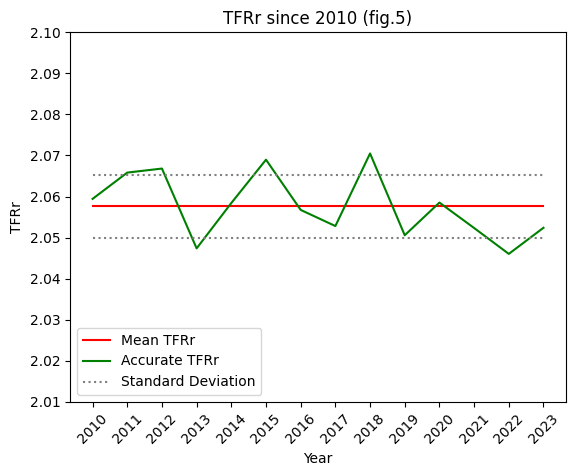

In [19]:
years_count = len(replacement_level_np[0])

plt.plot(replacement_level_np[0], [mean_tfrr_since_2010 for _ in range(years_count)], color='red')
plt.plot(replacement_level_np[0], replacement_level_np[3], color='green')
plt.plot(replacement_level_np[0], [(mean_tfrr_since_2010 - std_tfrr_since_2010) for _ in range(years_count)], color='grey', linestyle='dotted')
plt.plot(replacement_level_np[0], [(mean_tfrr_since_2010 + std_tfrr_since_2010) for _ in range(years_count)], color='grey', linestyle='dotted')
plt.xlabel('Year')
plt.ylabel('TFRr')
plt.xticks(rotation=45)
plt.yticks(np.arange(2.01, 2.10, 0.01))
plt.title('TFRr since 2010 (fig.5)')
plt.legend(['Mean TFRr', 'Accurate TFRr', 'Standard Deviation'], loc='lower left') 
plt.show()

_fig.5_ shows that most of the time the accurate replacement level is closer to the standard deviation than it is to the mean. The differences themselves are still quite small though and do not exceed the standard deviation by much. Now we will take a look at how the accurate replacement rates compare with the actual fertility rates for the past fourteen years _(fig.6)_.

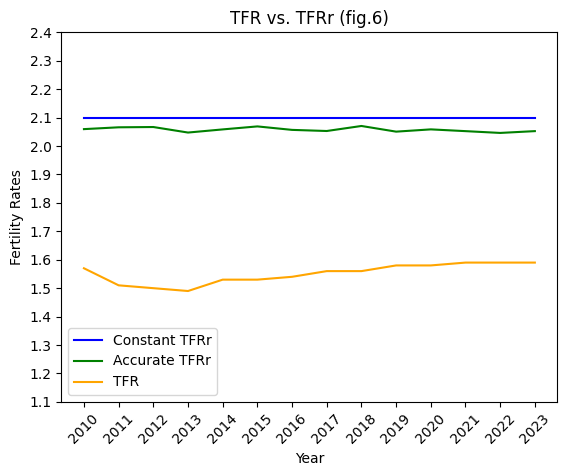

In [20]:
plt.plot(replacement_level_np[0], [2.1 for _ in range(years_count)], color='blue')
plt.plot(replacement_level_np[0], replacement_level_np[3], color='green')
plt.plot(replacement_level_np[0], demographics_table['Total Fertility Rate'].values[60:74], color='orange')
plt.xlabel('Year')
plt.ylabel('Fertility Rates')
plt.xticks(rotation=45)
plt.yticks(np.arange(1.1, 2.5, 0.1))
plt.title('TFR vs. TFRr (fig.6)')
plt.legend(['Constant TFRr', 'Accurate TFRr', 'TFR'], loc='lower left') 
plt.show()

Clearly, the difference between these numbers and generally accepted rate of 2.1 will not make the country's recent total fertility rates substantially more positive. In addition to that, since the sex ratios at birth are typically always a little higher than one and the mortality rate in question is significantly close to zero, there is little reason to suggest that the replacement level will fall much further.

Nevertheless, this information can be viewed in a more historical context. Although the NSI does not present data before 2010 on the topic, the UN provides data going decades back on infant mortality rates, female adult mortality rates, as well as the percentage of women that live at least 65 years of age. Looking at these results may be insightful as to what we can expect the replacement level to have looked like.

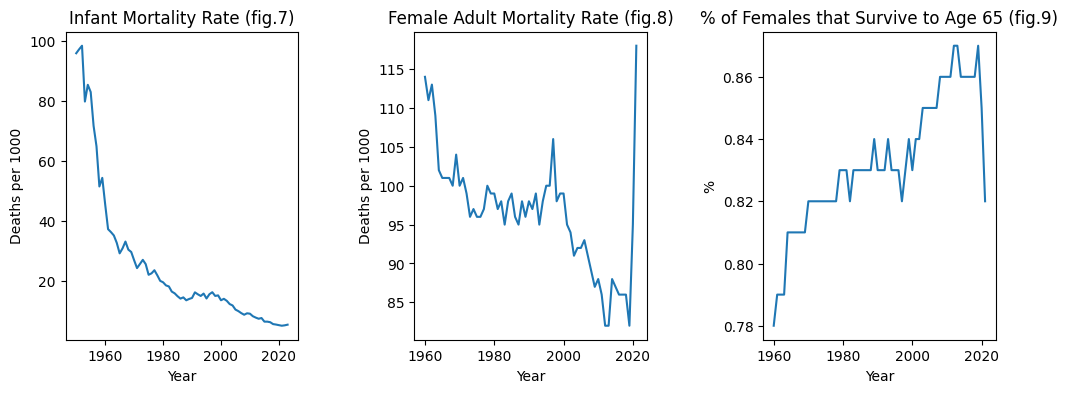

In [21]:
female_mortality_table = pd.read_csv('sql-database/female-mortality-table.csv')

f, ax = plt.subplots(1, 3)
ax[0].plot(demographics_table['YearId'].values, demographics_table['Infant Mortality Rate'].values)
ax[0].set_title('Infant Mortality Rate (fig.7)') 
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Deaths per 1000')

ax[1].plot(female_mortality_table['YearId'].values, female_mortality_table['Adult Female Mortality Rate'].values)
ax[1].set_title('Female Adult Mortality Rate (fig.8)') 
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Deaths per 1000')

ax[2].plot(female_mortality_table['YearId'].values, female_mortality_table['Survival to Age 65 (%)'].values)
ax[2].set_title('% of Females that Survive to Age 65 (fig.9)') 
ax[2].set_xlabel('Year')
ax[2].set_ylabel('%')

f.subplots_adjust(wspace=0.5, hspace=0.5)
f.set_figwidth(12)
f.set_figheight(4)
plt.show()

By definition, the lower the female mortality rate before the mean age of childbearing, the lower the replacement level. The information in the three graphs above gives us reason to expect those mortality rates to be higher in the past. Ignoring the recent spike in certain death rates during the COVID-19 pandemic, mortality was overall worse in the 20th century. Nonetheless, this data is not conclusive enough to make valid predictions. We need data on mortality rates by age groups, as well as evidence for the sex ratio of birth (even if it is often fairly consistent). 

### Conclusions and Possible Future Research
Bulgaria has a replacement fertility rate slightly below 2.1 children per woman and has had so for at least 14 years. This may signify that the country is consistently maintaining the image of a developed nation in regard to low mortality for the fertile population. Despite this, further data is required to say how accurate that statement is in a historical context. All the while, this does not change the fact that total fertility rates are still much lower than required to sustain the population.

It should be noted once again, that the overall population decline is not only due to the fertility rates being below replacement level. Negative net migration is also an essential component to the growth rates. Further research on this topic could involve finding a way to assimilate that factor in with the fertility rates to determine an even more accurate replcement level. Nick Par uses such a method when examining multiple countries in his paper on "A New Measure of Fertility Replacement Level in the Presence of Positive Net Immigration", even though he focuses on countries with more immigrants than emigrants. Applying a similar approach to Bulgaria may give us more insight into what an adequate replacement rate could look like. The more accurate we can get at determining the true replacement fertility rate, the better we will understand how far away we are from maintaining a stable population.

### Margins of Error
* Due to lack of sufficient data, we included female mortality rates up to the age group within which the mean age of childbearing was situated;
* Data from the United Nations and the National Statistics Institute in Bulgaria is not identical, meaning that the combination of data from the two sources could make findings less accurate;
* The infant mortality rates do not isolate male and female newborns, making them an unreliable factor in drawing conclusions on the replacement rates in the past.

### Bibliography

1. Birthgap - Childless World. Directed by Stephen Shaw, Inverted World Productions Limited, 2022.

2. Databank.worldbank. “Glossary | DataBank.” 2024, www.databank.worldbank.org/metadataglossary/population-estimates-and-projections/series/SM.POP.NETM. Accessed 17 June 2024.

3. database.earth. Infant Mortality Rate of Bulgaria. 2024. The United Nations - Department of Economic and Social Affairs (Population Division), www.database.earth/population/bulgaria/infant-mortality-rate. Accessed 17 June 2024.

4. database.earth. Mean Age of Childbearing in Bulgaria. 2024. The United Nations - Department of Economic and Social Affairs (Population Division), www.database.earth/population/bulgaria/mean-age-childbearing. Accessed 17 June 2024.

5. database.earth. Migration to & from Bulgaria Bulgaria. 2024. The United Nations - Department of Economic and Social Affairs (Population Division),
www.database.earth/population/bulgaria/migration. Accessed 17 June 2024.

6. database.earth. Population Births in Bulgaria. 2024. The United Nations - Department of Economic and Social Affairs (Population Division), www.database.earth/population/bulgaria/births. Accessed 17 June 2024.

7. database.earth. Population Deaths in Bulgaria. 2024. The United Nations - Department of Economic and Social Affairs (Population Division), www.database.earth/population/bulgaria/deaths. Accessed 17 June 2024.

8. database.earth. Population of Bulgaria. 2024. The United Nations - Department of Economic and Social Affairs (Population Division), www.database.earth/population/bulgaria. Accessed 17 June 2024.

9. database.earth. Total Fertility Rate of Bulgaria. 2024. The United Nations - Department of Economic and Social Affairs (Population Division), www.database.earth/population/bulgaria/fertility-rate. Accessed 17 June 2024.

10. Dimitrov, Vesselin. “In Search of a Homogeneous Nation: The Assimilation of Bulgaria’s Turkish  Minority, 1984-1985.” Journal of Ethnopolitics and Minority Issues in Europe, 23 Dec. 2000, www.ecmi.de/fileadmin/redakteure/publications/JEMIE_Datens%C3%A4tze/JEMIE01Dimitrov10-07-01.pdf. Accessed 17 June 2024.

11. Espenshade, Thomas J., et al. “The Surprising Global Variation in Replacement Fertility.” Population Research and Policy Review, vol. 22, no. 5/6, Dec. 2003, pp. 575–583, www.doi.org/10.1023/b:popu.0000020882.29684.8e.

12. Gietel-Basten, Stuart, and Sergei Scherbov. “Exploring the “True Value” of Replacement Rate Fertility.” Population Research and Policy Review, 4 Nov. 2019, www.doi.org/10.1007/s11113-019-09561-y. Accessed 17 June 2024.

13. Ljuboja, Dušan. “Migration Processes in the Balkans in the 20th and 21st Centuries.” CIRSD, 4 Apr. 2015, www.cirsd.org/en/young-contributors/migration-processes-in-the-balkans-in-the-20th-and-21st-centuries. Accessed 16 June 2024.

14. Mladenov, Chavdar, et al. “Demographical Development of Bulgaria during the Transitional Period.” Méditerranée, no. 110, 1 Jan. 2008, pp. 117–123, doi.org/10.4000/mediterranee.550. Accessed 17 June 2024.

15. National Population and Talent Division. “How Is the Total Fertility Rate Calculated?” Population.gov.sg, 2019, www.population.gov.sg/media-centre/articles/how-is-the-tfr-calculated/. Accessed 16 June 2024.

16. National Statistics Institute. Население по статистически райони, възраст, местоживеене и пол. 31 Dec. 2023. Pop_6.1.2_Pop_DR, www.nsi.bg/bg/content/2977/население-по-статистически-райони-възраст-местоживеене-и-пол. Accessed 14 June 2023.

17. National Statistics Institute. Раждания по местоживеене, статистически райони, области и пол. 29 Apr. 2024. Pop_1.1.1._birth_DR, www.nsi.bg/bg/content/2956/раждания-по-местоживеене-статистически-райони-области-и-пол. Accessed 14 June 2024.

18. National Statistics Institute. Умирания по области, възраст, местоживеене и пол. 29 Apr. 2024. Pop_2.2._mortality_DR, www.nsi.bg/bg/content/3008/умирания-по-области-възраст-местоживеене-и-пол. Accessed 14 June 2024.

19. Niva, V., Horton, A., Virkki, V. et al. World’s human migration patterns in 2000–2019 unveiled by high-resolution data. Nat Hum Behav 7, 2023. www.doi.org/10.1038/s41562-023-01689-4. Accessed 17 June 2024.

20. OECD Family Database. OECD -Social Policy Division -Directorate of Employment, Labour and Social Affairs. July 2023. www.oecd.org/els/soc/SF_2_3_Age_mothers_childbirth.pdf. Accessed 17 June 2024.

21. Parr N. A New Measure of Fertility Replacement Level in the Presence of Positive Net Immigration. Eur J Popul. 2020 Aug 5;37(1):243-262. doi: 10.1007/s10680-020-09566-w. PMID: 33603594; PMCID: PMC7865052.

22. Smallwood, Steve, and Jessica Chamberlain. “Replacement fertility, what has it been and what does it mean?” Population Trends, Spring 2005, pp. 16–27. www.lancashire.gov.uk/media/902570/ons-replacement-fertility.pdf. Accessed 16 June 2024.

23. World Bank Group. Mortality Rate, Adult, Female (per 1,000 Female Adults) - Bulgaria. 2022. United Nations Population Division. World Population Prospects: 2022 Revision, data.worldbank.org/indicator/SP.DYN.AMRT.FE?end=2021&locations=BG&start=1960. Accessed 16 June 2024.

24. World Bank Group. Survival to Age 65, Female (% of Cohort) - Bulgaria. United Nations Population Division. World Population Prospects: 2022 Revision, data.worldbank.org/indicator/SP.DYN.TO65.FE.ZS?end=2021&locations=BG&start=1960. Accessed 16 June 2024.

25. World Economic Forum. “This Is the Impact of the 2008 Crisis You Might Not Have Expected.” World Economic Forum, 15 Nov. 2018, www.weforum.org/agenda/2018/11/chart-of-the-week-bye-bye-baby-how-crises-affect-fertility-rates/. Accessed 17 June 2024.

26. World Health Organization. “Indicator Metadata Registry Details.” WHO, 2024, www.who.int/data/gho/indicator-metadata-registry/imr-details/1. Accessed 17 June 2024.